<a href="https://colab.research.google.com/github/ansonsibi1/Book_Recommendation_System_Anson_Sibi/blob/main/Book_Recommendation_System_Anson_Sibi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BOOK RECOMMENDATION SYSTEM**

#**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
<br>
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).<br>
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [ ]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


#**The Data**

The Book-Crossing dataset comprises 3 files.<br>
● Users :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● Books : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● Ratings :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [ ]:
#Books data
books=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Books.csv')
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
#Users data
users=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Users.csv')
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [ ]:
#Ratings Data
ratings=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Ratings.csv')
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

#EDA

##Books

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
L=((books.isnull().sum()).sort_values()).to_dict()
for i in L:
    print(i,"--->",L[i]) 

ISBN ---> 0
Book-Title ---> 0
Year-Of-Publication ---> 0
Image-URL-S ---> 0
Image-URL-M ---> 0
Book-Author ---> 1
Publisher ---> 2
Image-URL-L ---> 3


In [ ]:
print("unique isbn: ",len(books["ISBN"].unique()))
print("total rows: ",books.shape[0])
print("unique title: ",len(books["Book-Title"].unique()))
print("total rows: ",books.shape[0])

unique isbn:  271360
total rows:  271360
unique title:  242135
total rows:  271360


we can see that some titles are repeated

In [ ]:
books['Book-Author'].fillna("Unknown",inplace=True)
books['Publisher'].fillna("Unknown",inplace=True)
books.dropna(axis=0,inplace=True)
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

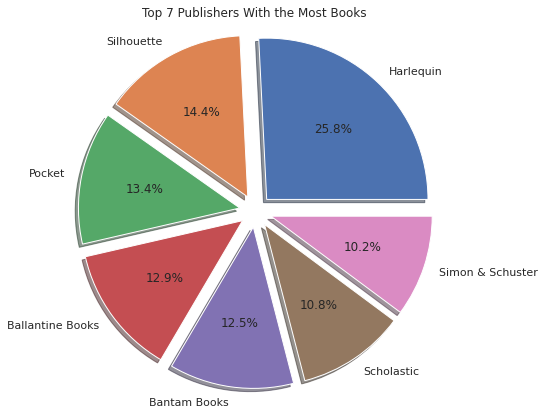

In [ ]:
my_dict=(books['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

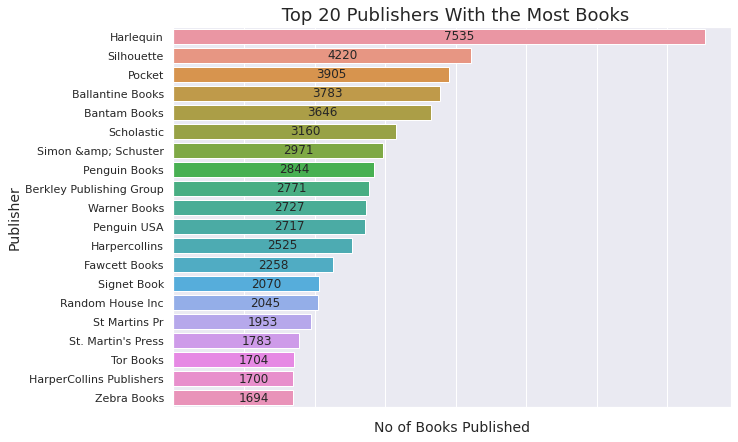

In [ ]:
b = count.sort_values(by=['count'], ascending = False)
b = b.head(20)
x =['Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon &amp; Schuster']
y = [7537,4220,3905,3783,3646,3160,2971]
fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'c' , data = b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width()/2, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

In [ ]:
np.set_printoptions(threshold=np.inf)
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

we can see that the years are object type and we have zeros as well as there is some error by including names in years



In [ ]:
index=books.loc[books['Year-Of-Publication']=='DK Publishing Inc'].index
books.drop(index,inplace=True)
index=books.loc[books['Year-Of-Publication']=='Gallimard'].index
books.drop(index,inplace=True)
books['Year-Of-Publication'].replace({'0':books['Year-Of-Publication'].value_counts().idxmax()},inplace=True)
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str).astype(int)
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

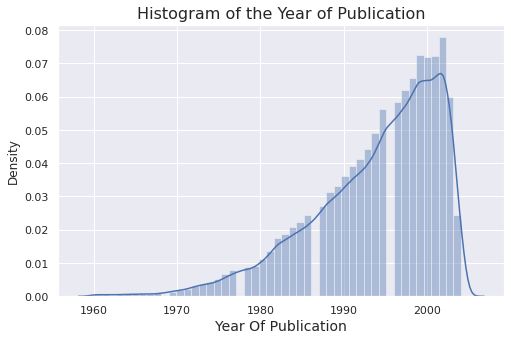

In [ ]:
fig=plt.figure(figsize=(8,5))
y1 = books[books['Year-Of-Publication'] >= 1960]
y1 = y1[y1['Year-Of-Publication'] <= 2005]
sns.distplot(y1['Year-Of-Publication'])
plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=16)
plt.show()

##Users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
#Function to get percentage of missing values
def missing_values(df):
  columns=df.columns
  missing=[]
  percentage=[]
  for i in columns:
    x=df[i].isnull().sum()
    missing.append(x)
    percentage.append((x/len(df))*100)
  data={'Features':columns,'Missing':missing ,'Percentage of total values':percentage}
  return pd.DataFrame(data).reset_index(drop=True) 


In [ ]:
#Finding missing values in Users dataset
missing_values(users)

Features  Missing  Percentage of total values
0   User-ID        0                    0.000000
1  Location        0                    0.000000
2       Age   110762                   39.719857

Text(0.5, 1.0, 'Find outlier data in Age column')

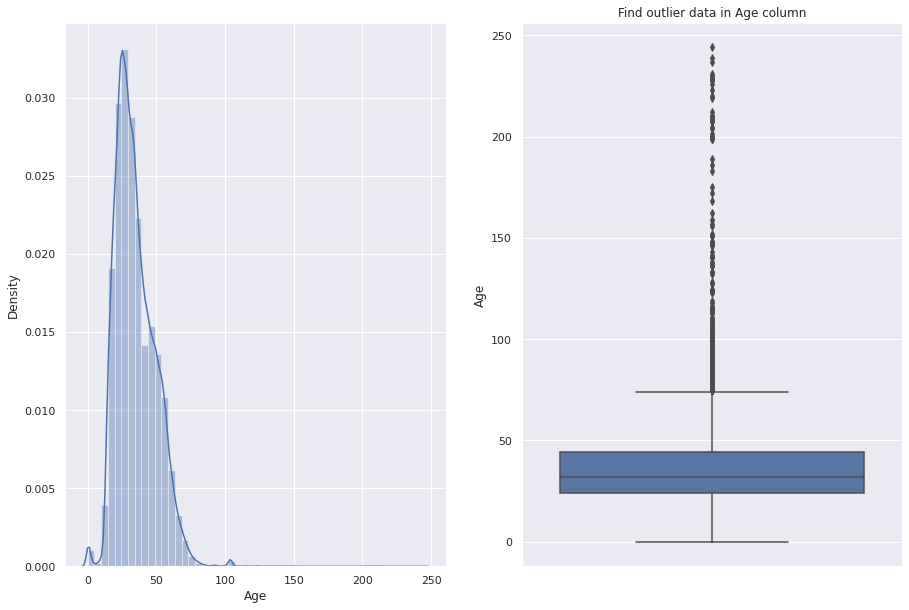

In [ ]:
sns.set_theme();
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

#Age Distribution
sns.distplot(users['Age'],ax=ax1)
plt.title('Distribution of Age')

#Outlier Detection in Age column
sns.boxplot(y='Age', data=users,ax=ax2)
plt.title('Find outlier data in Age column')



1.   Age distribution is positively skewed.
2.   There are outliers in age column.As Age distribution is positively skewed median is used to remove outliers and replace missing values.



In [ ]:
#Replacing NaN values in Age column.
users['Age'].fillna(users['Age'].value_counts().median(),inplace=True)

#Removing outliers in Age.
for i in users['Age'][users['Age']>95]:
        users['Age'].replace({i:users['Age'].value_counts().median()},inplace=True)
for i in users['Age'][users['Age']==0]:
        users['Age'].replace({i:users['Age'].value_counts().median()},inplace=True)
users['Age'] = users['Age'].astype(int) 
users['Age'].unique()

array([ 26,  18,  17,  61,  14,  25,  19,  46,  55,  32,  24,  20,  34,
        23,  51,  31,  21,  44,  30,  57,  43,  37,  41,  54,  42,  50,
        39,  53,  47,  36,  28,  35,  13,  58,  49,  38,  45,  62,  63,
        27,  33,  29,  66,  40,  15,  60, 286,  79,  22,  16,  65,  59,
        48,  72,  56,  67,   1,  80,  52,  69,  71,  73,  78,   9,  64,
        12,  74,  75,   3,  76,  83,  68,  11,  77,   2,  70,  93,   8,
         7,   4,  81,  10,   5,   6,  84,  82,  90,  91,  94,  85,  86,
        92,  87,  95,  89,  88, 181, 109, 119, 116, 120, 121, 145, 170,
       192, 193, 197, 201, 212, 223, 254])

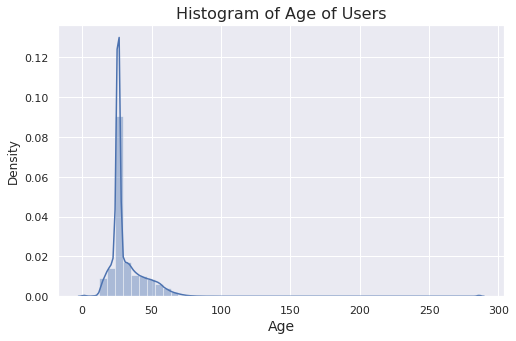

In [ ]:
#Distribution of age after cleaning.
fig=plt.figure(figsize=(8,5))
sns.distplot(users['Age'])
plt.xlabel('Age',size=14)
plt.title('Histogram of Age of Users',size=16)
plt.show()

In [ ]:
users['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [ ]:
#Creating new columns using the feature Location.
users[['city','state','country']]=users['Location'].apply(lambda x: pd.Series(str(x).split(",")[:3]))
users.drop(['Location'],axis=1,inplace=True)
users

User-ID  Age         city             state          country
0             1   26          nyc          new york              usa
1             2   18     stockton        california              usa
2             3   26       moscow   yukon territory           russia
3             4   17        porto          v.n.gaia         portugal
4             5   26  farnborough             hants   united kingdom
...         ...  ...          ...               ...              ...
278853   278854   26     portland            oregon              usa
278854   278855   50       tacoma        washington   united kingdom
278855   278856   26     brampton           ontario           canada
278856   278857   26    knoxville         tennessee              usa
278857   278858   26       dublin               n/a          ireland

[278858 rows x 5 columns]

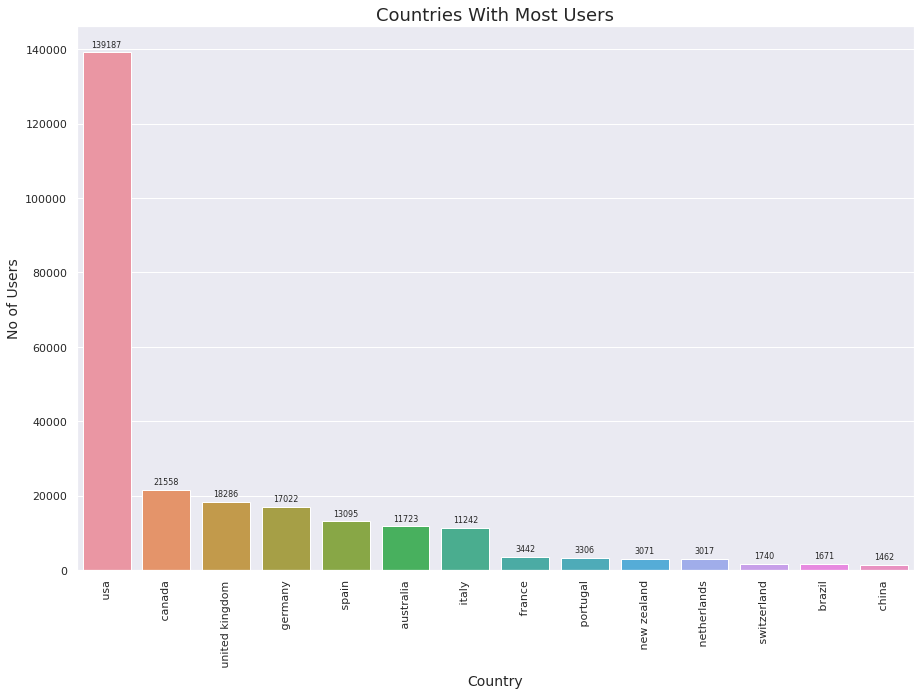

In [ ]:
#Countries with most users
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f.drop(7,inplace=True)
fig=plt.figure(figsize=(15,10))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

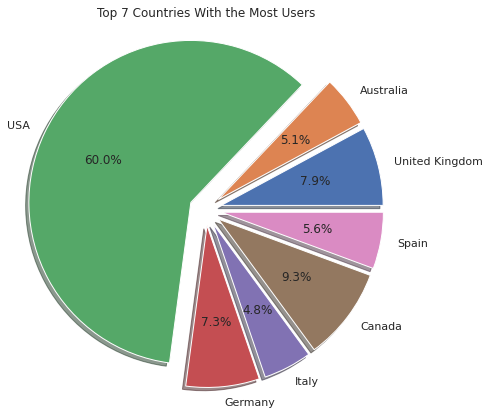

In [ ]:
# Pie chart showing countries with most number of users 
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],
         count['count'].iloc[1],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')

plt.show()




*   Users Dataset has three columns User-Id ,Location and Age
*   The column age has large number of missing values and outliers.

*   USA has the highest number of users followed by Canada and UK.
  



##Rating

In [ ]:
#Shape of the dataset
print(ratings.shape)
ratings.columns=['User-ID','ISBN','Book-Rating']
ratings.head()

(1149780, 3)


User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [ ]:
#Finding missing values in ratings dataset
missing_values(ratings)

Features  Missing  Percentage of total values
0      User-ID        0                         0.0
1         ISBN        0                         0.0
2  Book-Rating        0                         0.0

In [ ]:
#Finding the unique values in Rating column.
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

**So there are no outliers in Rating column.**

In [ ]:
filter1 = ratings[ratings["User-ID"].isin(users["User-ID"])] 
df_ratings=filter1[filter1["ISBN"].isin(books["ISBN"])] 
df=pd.merge(users,df_ratings,on='User-ID')
df

User-ID  Age      city        state  country        ISBN  Book-Rating
0              2   18  stockton   california      usa  0195153448            0
1              8   26   timmins      ontario   canada  0002005018            5
2              8   26   timmins      ontario   canada  0060973129            0
3              8   26   timmins      ontario   canada  0374157065            0
4              8   26   timmins      ontario   canada  0393045218            0
...          ...  ...       ...          ...      ...         ...          ...
1031127   278854   26  portland       oregon      usa  0425163393            7
1031128   278854   26  portland       oregon      usa  0515087122            0
1031129   278854   26  portland       oregon      usa  0553275739            6
1031130   278854   26  portland       oregon      usa  0553578596            0
1031131   278854   26  portland       oregon      usa  0553579606            8

[1031132 rows x 7 columns]

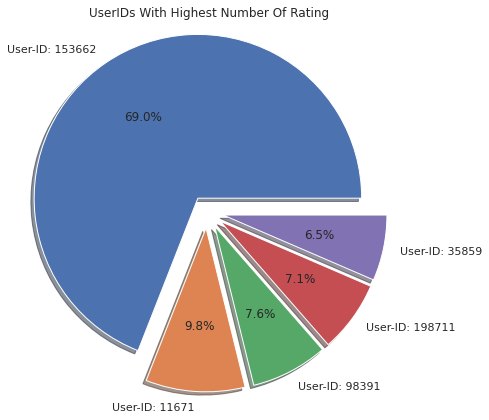

In [ ]:
my_dict=(df_ratings['Book-Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'User-ID: 153662','User-ID: 11671','User-ID: 98391','User-ID: 198711','User-ID: 35859'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("UserIDs With Highest Number Of Rating")
ax1.axis ('equal')

plt.show()

In [ ]:
df_ratings=df_ratings[df_ratings['Book-Rating']>0]
df_ratings['Book-Rating'].value_counts()

8     91804
10    71225
7     66401
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: Book-Rating, dtype: int64

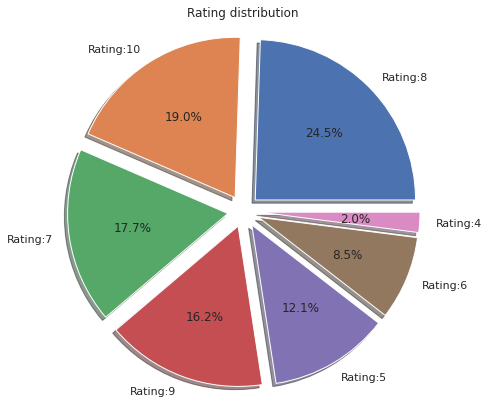

In [ ]:
# Pie chart showing users rated with highest number of ratings given to books.
my_dict=(df_ratings['Book-Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
labels = 'Rating:8','Rating:10','Rating:7','Rating:9','Rating:5','Rating:6','Rating:4'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Rating distribution")
ax1.axis ('equal')

plt.show()

#Popularity Based

<font color='blue'>As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.

In [ ]:
# Create column Rating average 
final_df['Avg_Rating']=final_df.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
final_df['Total_No_Of_Users_Rated']=final_df.groupby('ISBN')['Book-Rating'].transform('count')

In [ ]:
C= final_df['Avg_Rating'].mean()
m= final_df['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = final_df.loc[final_df['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.736148921808029 , m=42.0


(27113, 11)

<font color='blue'>Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:


In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

#Memory Based

##Item -Based Collaborative filtering

In [ ]:
# We can calculate the ratings of the books and eliminate the rare books by determining a threshold which is 5 in this case by removing the main dataframe.
# Finally, we have common books which are rated more than 8.
rating_book = pd.DataFrame(final_df['Book-Title'].value_counts())
final_df['Book-Title'].value_counts().mean() # 

rare_books = rating_book[rating_book['Book-Title'] <=5].index

common_books = final_df[~final_df["Book-Title"].isin(rare_books)]
common_books['Book-Title'].value_counts().mean() 

16.147133502605907

In [ ]:
# Creating User-Item Matrix Dataframe
user_book_matrix = common_books.pivot_table(index=['User-ID'], columns=['Book-Title'], values='Book-Rating').fillna(0)
user_book_matrix.shape

(26994, 7483)

In [ ]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(user_book_matrix.values)


In [ ]:

df=user_book_matrix.T

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute',n_neighbors=6)
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values)

In [ ]:
for i in indices[188]:
  print(df.index[indices[i]].values)

['A River Runs Through It, and Other Stories'
 'The Celestine Prophecy : AN EXPERIENTIAL GUIDE' 'Crossing to Safety'
 'Gods and Generals' 'The Piano Teacher'
 'Ill Wind (Anna Pigeon Mysteries (Paperback))']
['The Celestine Prophecy : AN EXPERIENTIAL GUIDE'
 'The Tenth Insight : Holding the Vision' 'The Piano Teacher'
 'Feng Shui Step by Step: Arranging Your Home for Health and Happiness-With Personalized Astrological Charts'
 'Firehouse' 'The Beet Queen']
['Crossing to Safety' 'A River Runs Through It, and Other Stories'
 'Gods and Generals' 'The Celestine Prophecy : AN EXPERIENTIAL GUIDE'
 'Ill Wind (Anna Pigeon Mysteries (Paperback))' 'The End of the Pier']
['Gods and Generals' 'A River Runs Through It, and Other Stories'
 'Gaudy Night' 'Cuba Libre' 'Reflex' 'Murder Must Advertise']
['The Piano Teacher' 'A Personal Matter'
 'The Celestine Prophecy : AN EXPERIENTIAL GUIDE'
 'The Dewey Decimal System of Love' "The Queen's Fool : A Novel"
 'Feng Shui Step by Step: Arranging Your Home fo

In [ ]:
import requests
from PIL import Image


In [ ]:
def item_based_reco(book_name):
    book_id=np.where(df.index==book_name)[0][0]
    lis=df.index[indices[book_id]].values.tolist()[1:]
    score=distances[book_id].tolist()[1:]
    data={'Book Recommendations':lis ,'Similarity Score':score}
    
  
    fig, axs = plt.subplots(1, 5,figsize=(20,8))
    fig.suptitle('Book Recommendations', size = 22)
    for i in range(len(lis)):
     
      url = books.loc[books['Book-Title'] ==lis[i],'Image-URL-L'][:1].values[0]
      im = Image.open(requests.get(url, stream=True).raw)
      axs[i].imshow(im)
      axs[i].axis("off")
      axs[i].set_title('Rating: {}'.format(round(common_books[common_books['Book-Title'] == lis[i]]['Book-Rating'].mean(),1)),
                    y=-0.18,
                        color="red",
                        fontsize=18)
      fig.show()
    return pd.DataFrame(data)

Book Recommendations  Similarity Score
0               The Judge          0.872460
1  Above the Law: A Novel          0.876144
2            The Brethren          0.891667
3   Special Circumstances          0.899969
4             The Summons          0.899990

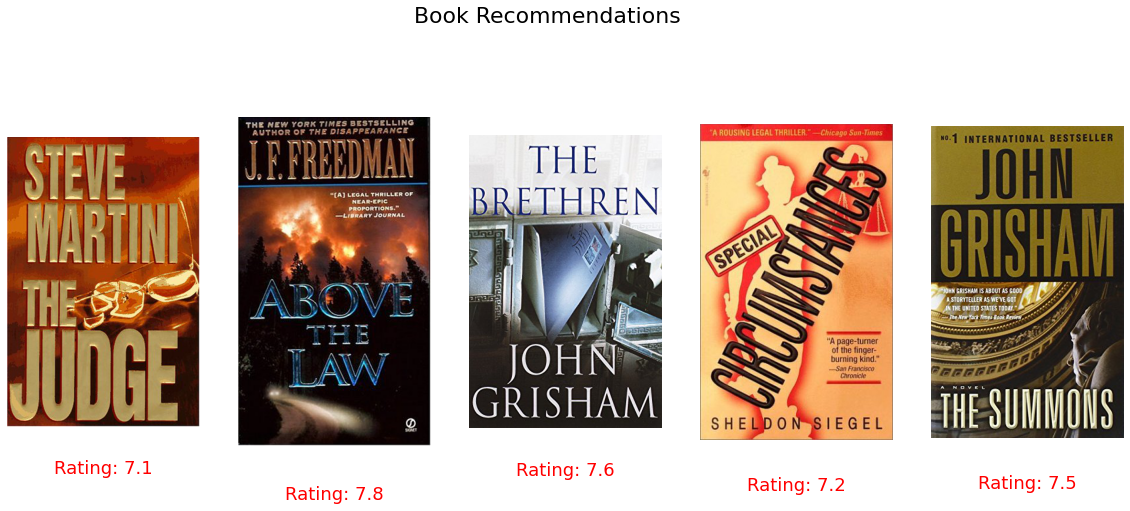

In [ ]:
item_based_reco('A Painted House')

Book Recommendations  Similarity Score
0  Tuesdays with Morrie: An Old Man, a Young Man,...          0.849271
1                               On a Night Like This          0.863930
2                                     Together Alone          0.878032
3                                     The Snow Bride          0.885956
4         Nighttime Is My Time (Clark, Mary Higgins)          0.892233

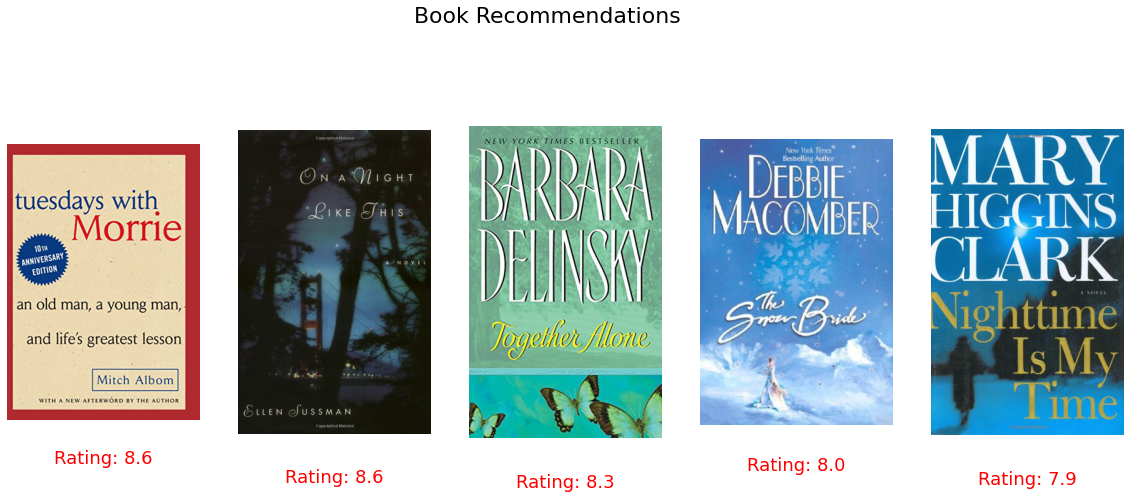

In [ ]:
item_based_reco('The Five People You Meet in Heaven')

#User Based collaborative filtering


In [ ]:
users=common_books['User-ID'].value_counts().sort_values(ascending=False)
x=round(len(users)*(0.3))

In [ ]:
users[300:380]

254899    51
138844    51
127233    50
55187     50
8253      50
          ..
52614     43
220597    43
124078    43
210959    43
212965    43
Name: User-ID, Length: 80, dtype: int64

In [ ]:
top_users=users[:x].index.tolist()


In [ ]:
common_users = common_books[common_books["User-ID"].isin(top_users)]


In [ ]:
user_book_df =common_users.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating") 
user_book_df.head()

Book-Title  'Salem's Lot  10 Lb. Penalty  \
User-ID                                    
92                   NaN             NaN   
99                   NaN             NaN   
114                  NaN             NaN   
242                  NaN             NaN   
254                  NaN             NaN   

Book-Title  100 Selected Poems by E. E. Cummings  \
User-ID                                            
92                                           NaN   
99                                           NaN   
114                                          NaN   
242                                          NaN   
254                                          NaN   

Book-Title  101 Best Home-Based Businesses for Women  101 Dalmatians  \
User-ID                                                                
92                                               NaN             NaN   
99                                               NaN             NaN   
114                                              NaN             NaN   
242                                              NaN             NaN   
254                                              NaN             NaN   

Book-Title  14,000 Things to Be Happy About  16 Lighthouse Road  \
User-ID                                                           
92                                      NaN                 NaN   
99                                      NaN                 NaN   
114                                     NaN                 NaN   
242                                     NaN                 NaN   
254                                     NaN                 NaN   

Book-Title  1632 (Assiti Shards (Paperback))  1984  \
User-ID                                              
92                                       NaN   NaN   
99                                       NaN   NaN   
114                                      NaN   NaN   
242                                      NaN   NaN   
254                                      NaN   9.0   

Book-Title  1984 (Spanish Language Edition)  ...  ZwÃ?Â¶lf.  \
User-ID                                      ...              
92                                      NaN  ...        NaN   
99                                      NaN  ...        NaN   
114                                     NaN  ...        NaN   
242                                     NaN  ...        NaN   
254                                     NaN  ...        NaN   

Book-Title  \ Lamb to the Slaughter and Other Stories (Penguin 60s S.)"  \
User-ID                                                                   
92                                                        NaN             
99                                                        NaN             
114                                                       NaN             
242                                                       NaN             
254                                                       NaN             

Book-Title  \Girls' Night Out\"/\"Boys' Night In\""  \O\" Is for Outlaw"  \
User-ID                                                                    
92                                              NaN                  NaN   
99                                              NaN                  NaN   
114                                             NaN                  NaN   
242                                             NaN                  NaN   
254                                             NaN                  NaN   

Book-Title  \Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"  \
User-ID                                                                                 
92                                                        NaN                           
99                                                        NaN                           
114                                                       NaN                           
242                       

In [ ]:
random_user=153662          
  


In [ ]:
random_user_df = user_book_df[user_book_df.index == random_user]

books_rated = random_user_df.columns[random_user_df.notna().any()].tolist()

len(books_rated)

468

In [ ]:
#Number of similar users to random user
books_rated_df = user_book_df[books_rated]
books_rated_df.shape[0]

8098

In [ ]:
#All similar users and the number of books that rated by them
user_book_count = books_rated_df.T.notnull().sum()
user_book_count

User-ID
92        0
99        0
114       1
242       1
254       4
         ..
278586    0
278694    0
278832    0
278843    2
278851    1
Length: 8098, dtype: int64

In [ ]:
user_book_count = user_book_count.reset_index()
user_book_count.columns = ["userId", "book_count"]
user_book_count

userId  book_count
0         92           0
1         99           0
2        114           1
3        242           1
4        254           4
...      ...         ...
8093  278586           0
8094  278694           0
8095  278832           0
8096  278843           2
8097  278851           1

[8098 rows x 2 columns]

In [ ]:
users_same_books = user_book_count[user_book_count["book_count"] > 10]["userId"]
users_same_books

144       5582
340      12982
359      13552
447      16795
640      23872
         ...  
7687    264082
7736    265889
7939    273113
7965    274061
8023    276165
Name: userId, Length: 96, dtype: int64

In [ ]:
#Identifying Users with the Most Similar Behaviors to the User to Suggest
final_df1 = pd.concat([user_book_df[user_book_df.index.isin(users_same_books)],
                      random_user_df[books_rated]])

final_df1.head()

Book-Title  'Salem's Lot  10 Lb. Penalty  \
User-ID                                    
5582                 NaN             NaN   
12982                NaN             NaN   
13552                NaN             NaN   
16795                NaN             NaN   
23872                NaN             NaN   

Book-Title  100 Selected Poems by E. E. Cummings  \
User-ID                                            
5582                                         NaN   
12982                                        NaN   
13552                                        NaN   
16795                                        NaN   
23872                                        NaN   

Book-Title  101 Best Home-Based Businesses for Women  101 Dalmatians  \
User-ID                                                                
5582                                             NaN             NaN   
12982                                            NaN             NaN   
13552                                            NaN             NaN   
16795                                            NaN             NaN   
23872                                            NaN             NaN   

Book-Title  14,000 Things to Be Happy About  16 Lighthouse Road  \
User-ID                                                           
5582                                    NaN                 NaN   
12982                                   NaN                 NaN   
13552                                   NaN                 NaN   
16795                                   NaN                 NaN   
23872                                   NaN                 NaN   

Book-Title  1632 (Assiti Shards (Paperback))  1984  \
User-ID                                              
5582                                     NaN   NaN   
12982                                    NaN   NaN   
13552                                    NaN   NaN   
16795                                    NaN   8.0   
23872                                    NaN   7.0   

Book-Title  1984 (Spanish Language Edition)  ...  ZwÃ?Â¶lf.  \
User-ID                                      ...              
5582                                    NaN  ...        NaN   
12982                                   NaN  ...        NaN   
13552                                   NaN  ...        NaN   
16795                                   NaN  ...        NaN   
23872                                   NaN  ...        NaN   

Book-Title  \ Lamb to the Slaughter and Other Stories (Penguin 60s S.)"  \
User-ID                                                                   
5582                                                      NaN             
12982                                                     NaN             
13552                                                     NaN             
16795                                                     NaN             
23872                                                     NaN             

Book-Title  \Girls' Night Out\"/\"Boys' Night In\""  \O\" Is for Outlaw"  \
User-ID                                                                    
5582                                            NaN                  NaN   
12982                                           NaN                  NaN   
13552                                           NaN                  NaN   
16795                                           NaN                  NaN   
23872                                           NaN                  NaN   

Book-Title  \Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"  \
User-ID                                                                                 
5582                                                      NaN                           
12982                                                     NaN                           
13552                                                     NaN                           
16795                     

In [ ]:
final_df1.T.corr()

User-ID    5582      12982     13552     16795     23872     30276     31315   \
User-ID                                                                         
5582     1.000000       NaN  0.738549 -0.282602 -0.114708       NaN  0.943242   
12982         NaN  1.000000 -0.198450  0.161515       NaN       NaN -0.500000   
13552    0.738549 -0.198450  1.000000  0.063940  0.405356  0.852941  0.167724   
16795   -0.282602  0.161515  0.063940  1.000000  0.330407  0.565831  0.346226   
23872   -0.114708       NaN  0.405356  0.330407  1.000000 -0.419314  0.217072   
...           ...       ...       ...       ...       ...       ...       ...   
265889  -0.720577       NaN  0.565916  0.337995       NaN  0.188982  0.800641   
273113        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
274061        NaN  1.000000 -0.169031  0.668153       NaN       NaN       NaN   
276165        NaN       NaN -0.188982 -0.482382  1.000000  0.500000       NaN   
153662   0.071507 -0.292770  0.143904  0.018296  0.348587  0.202260  0.249824   

User-ID    31826         37208     40889   ...    254465    258185  \
User-ID                                    ...                       
5582          NaN  1.000000e+00  1.000000  ...       NaN       NaN   
12982         NaN -1.000000e+00       NaN  ...       NaN       NaN   
13552         NaN           NaN -0.127921  ...       NaN -0.221163   
16795   -0.015179           NaN  0.197286  ... -0.014020  0.500000   
23872    0.160514           NaN -0.917663  ...       NaN       NaN   
...           ...           ...       ...  ...       ...       ...   
265889        NaN  1.093272e-16       NaN  ...       NaN  0.328266   
273113        NaN           NaN       NaN  ...       NaN       NaN   
274061  -0.072232  1.000000e+00       NaN  ...       NaN       NaN   
276165        NaN           NaN       NaN  ...       NaN -0.500000   
153662        NaN  3.152036e-01 -0.274901  ...  0.157903  0.122245   

User-ID        258534    261829    264082    265889  273113    274061  \
User-ID                                                                 
5582              NaN -0.722806       NaN -0.720577     NaN       NaN   
12982             NaN -0.866025       NaN       NaN     NaN  1.000000   
13552   -5.147105e-16 -0.049029 -0.710047  0.565916     NaN -0.169031   
16795   -2.586622e-01  0.114549 -0.235435  0.337995     NaN  0.668153   
23872   -7.425879e-16 -0.774597  0.693375       NaN     NaN       NaN   
...               ...       ...       ...       ...     ...       ...   
265889            NaN       NaN       NaN  1.000000     NaN       NaN   
273113            NaN       NaN       NaN       NaN     NaN       NaN   
274061            NaN  0.301511       NaN       NaN     NaN  1.000000   
276165            NaN       NaN       NaN  1.000000     NaN       NaN   
153662  -5.547659e-02  0.135603  0.138507  0.154111     NaN       NaN   

User-ID    276165    153662  
User-ID                      
5582          NaN  0.071507  
12982         NaN -0.292770  
13552   -0.188982  0.143904  
16795   -0.482382  0.018296  
23872    1.000000  0.348587  
...           ...       ...  
265889   1.000000  0.154111  
273113        NaN       NaN  
274061        NaN       NaN  
276165   1.000000  0.466667  
153662   0.466667  1.000000  

[97 rows x 97 columns]

In [ ]:
corr_df = final_df1.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()

user_id_1  user_id_2  corr
0      81492     177432  -1.0
1     137742     264082  -1.0
2     102647     137742  -1.0
3     229741       5582  -1.0
4      98391     226965  -1.0

In [ ]:
# We can choose users with more than 0.70 correlation with selected user.
similar_users = corr_df[(corr_df['corr'] >= 0.70) & (corr_df['user_id_1'] == random_user)][['user_id_2','corr']]
similar_users = similar_users.reset_index(drop=True)
similar_users.rename(columns={'user_id_2':'User-ID',
                              'corr':'Correlations'}, inplace=True)
similar_users


User-ID  Correlations
0   207349      0.709036
1   228764      0.712786
2   228764      0.712786
3    81492      0.733799
4   177090      0.789802

In [ ]:
#a reader can be good correlate with our user, but it maybe voted low rating points. Therefore, we should take into account also ratings.
# Hence, we can recommend good rating books to readers.

# So, we should calculate Weighted Score.

similar_users_df = similar_users.merge(ratings, how='inner',on='User-ID')
similar_users_df = similar_users_df.merge(books,how='inner', on='ISBN')
similar_users_df = similar_users_df[similar_users_df['User-ID'] != random_user]

# Calculation Weighted Score
similar_users_df['Weighted Score'] = (0.4 * similar_users_df['Correlations'] + 0.6 * (similar_users_df['Book-Rating'] / 10)) / 2

In [ ]:
similar_users_df.sort_values(by='Weighted Score',ascending=False)

similar_users_df.groupby('User-ID').agg({'Weighted Score':'mean'})

Weighted Score
User-ID                
81492          0.181086
177090         0.199524
207349         0.220177
228764         0.161957

In [ ]:
# Finally, we can calculate the weighted score on books. Additionally, a threshold has to be determined for the score, in this case 8.5,
# so that the recommender system do not recommend to the users all of the books which have scores.
recommendation_df = similar_users_df.groupby('Book-Title').agg({'Weighted Score':'mean'}).reset_index()
recommendation_df_by_score = recommendation_df[recommendation_df["Weighted Score"] > 0.40].sort_values(by='Weighted Score',ascending=False)
recommendation_df_by_score = recommendation_df_by_score.merge(books, how='inner',on='Book-Title')
recommendation_df_by_score

Book-Title  Weighted Score  \
0                                    Judgment in Death        0.457960   
1                   A Window in Time (Harper Monogram)        0.457960   
2                                        PC Annoyances        0.457960   
3    The Berenstain Bear Scouts in Giant Bat Cave (...        0.457960   
4                                            Evergreen        0.457960   
..                                                 ...             ...   
198                                      Dark Paradise        0.411807   
199                                  Darkling I Listen        0.411807   
200                                  Darkling I Listen        0.411807   
201                                 Saint's Temptation        0.411807   
202  The Divine Secrets of the Ya-Ya Sisterhood: A ...        0.407692   

           ISBN          Book-Author Year-Of-Publication  \
0    0425176304           J. D. Robb                2004   
1    006108171X      Carolyn Lampman                1995   
2    0596005938           Steve Bass                2003   
3    0590603795      Stan Berenstain                1997   
4    0440132789          Belva Plain                1987   
..          ...                  ...                 ...   
198  0446322059        Mary S. Craig                1986   
199  0515131520  Katherine Sutcliffe                2001   
200  0739419811  Katherine Sutcliffe                2001   
201  0843944595           Debra Dier                1998   
202  0060502258        Rebecca Wells                2002   

                              Publisher  \
0              Berkley Publishing Group   
1    Harper Mass Market Paperbacks (Mm)   
2                              O'Reilly   
3                            Scholastic   
4                                  Dell   
..                                  ...   
198                        Warner Books   
199                          Jove Books   
200        The Berkley Publishing Group   
201                       Leisure Books   
202                         HarperTorch   

                                           Image-URL-S  \
0    http://images.amazon.com/images/P/0425176304.0...   
1    http://images.amazon.com/images/P/006108171X.0...   
2    http://images.amazon.com/images/P/0596005938.0...   
3    http://images.amazon.com/images/P/0590603795.0...   
4    http://images.amazon.com/images/P/0440132789.0...   
..                                                 ...   
198  http://images.amazon.com/images/P/0446322059.0...   
199  http://images.amazon.com/images/P/0515131520.0...   
200  http://images.amazon.com/images/P/0739419811.0...   
201  http://images.amazon.com/images/P/0843944595.0...   
202  http://images.amazon.com/images/P/0060502258.0...   

                                           Image-URL-M  \
0    http://images.amazon.com/images/P/0425176304.0...   
1    http://images.amazon.com/images/P/006108171X.0...   
2    http://images.amazon.com/images/P/0596005938.0...   
3    http://images.amazon.com/images/P/0590603795.0...   
4    http://images.amazon.com/images/P/0440132789.0...   
..                                                 ...   
198  http://images.amazon.com/images/P/0446322059.0...   
199  http://images.amazon.com/images/P/0515131520.0...   
200  http://images.amazon.com/images/P/0739419811.0...   
201  http://images.amazon.com/images/P/0843944595.0...   
202  http://images.amazon.com/images/P/0060502258.0...   

                                           Image-URL-L  
0    http://images.amazon.com/images/P/0425176304.0...  
1    http://images.amazon.com/images/P/006108171X.0...  
2    http://images.amazon.com/images/P/0596005938.0...  
3    http://images.amazon.com/images/P/0590603795.0...  
4    http://images.amazon.com/images/P/0440132789.0...  
..                                                 ...  
198  http://images.amazon.com/images/P/0446322059.0...  
199  http://images.amazon.com/images/P/0515131520.0...  
200  http:

In [ ]:
# Lastly, we can determine a list to will be recommended.
recommended_list = recommendation_df_by_score.sort_values(by='Weighted Score',ascending=False).drop_duplicates(subset='Book-Title')['Book-Title'].head(10).to_list()
recommended_list

['Judgment in Death',
 'PC Annoyances',
 'The Berenstain Bear Scouts in Giant Bat Cave (Berenstain Bear Scouts (Paperback))',
 'Evergreen',
 'J Is for Judgment',
 'A Window in Time (Harper Monogram)',
 'Dance upon the Air (Three Sisters Island Trilogy)',
 'Anonymous Rex: A Detective Story',
 'The Blue Viking',
 'Ransom']

In [ ]:
def user_book_reco(user):
  recommended_list = recommendation_df_by_score.sort_values(by='Weighted Score',ascending=False).drop_duplicates(subset='Book-Title')['Book-Title'].head(10).to_list()
  lis=recommended_list[:5]
  data={'Book Recommendations':lis}


  fig, axs = plt.subplots(1, 5,figsize=(20,8))
  fig.suptitle('Book Recommendations', size = 22)
  for i in range(len(lis)):
    
    url = books.loc[books['Book-Title'] ==lis[i],'Image-URL-L'][:1].values[0]
    im = Image.open(requests.get(url, stream=True).raw)
    axs[i].imshow(im)
    axs[i].axis("off")
    axs[i].set_title('Average Rating: {}'.format(round(common_books[common_books['Book-Title'] == lis[i]]['Book-Rating'].mean(),1)),
                  y=-0.18,
                      color="red",
                      fontsize=18)
    fig.show()
  return pd.DataFrame(data).reset_index(drop=True)


Book Recommendations
0                                  Judgment in Death
1                                      PC Annoyances
2  The Berenstain Bear Scouts in Giant Bat Cave (...
3                                          Evergreen
4                                  J Is for Judgment

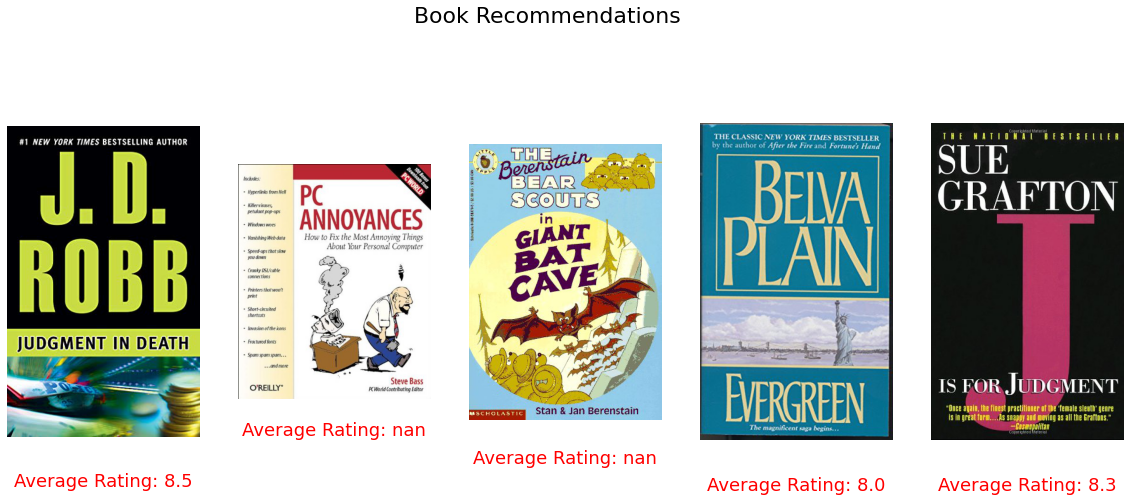

In [ ]:
user_book_reco(random_user)

##Model-Based Collaborative Filtering

In [ ]:
import scipy
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split

Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 7.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633706 sha256=8884ba92d290d530a5ef4b17c72861aed84449b8b1cfc51fffd3b13823e127be
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=common_books.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['User-ID','Book-Title','Book-Rating']], reader)

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.593970
test_mae     1.227569
fit_time     9.522963
test_time    0.677071
dtype: float64

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.556679
test_mae      2.168322
fit_time     12.483611
test_time     0.697627
dtype: float64

<font color='blue'>
It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

##**Optimisation of SVD algorithm**<br>
Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
<br>
It is used to find the best setting of parameters:
<br>
n_factors - the number of factors<br>
n_epochs - the number of iteration of the SGD procedure<br>
lr_all - the learning rate for all parameters<br>
reg_all - the regularization term for all parameters<br>
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5889404783174477
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}



#Analysis of Collaborative Filtering model results
In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
predictions

[Prediction(uid=133738, iid='Silence of the Lambs', r_ui=8.0, est=8.570597684921067, details={'was_impossible': False}),
 Prediction(uid=1309, iid='Easy Prey', r_ui=10.0, est=7.657449519840401, details={'was_impossible': False}),
 Prediction(uid=104144, iid='Long After Midnight', r_ui=9.0, est=8.514586559475397, details={'was_impossible': False}),
 Prediction(uid=149510, iid='Rosie: A Novel', r_ui=7.0, est=7.677534967185766, details={'was_impossible': False}),
 Prediction(uid=165319, iid='Ghost World', r_ui=7.0, est=6.587587186412791, details={'was_impossible': False}),
 Prediction(uid=201353, iid='A Shocker on Shock Street (Goosebumps, No 35)', r_ui=6.0, est=6.697263268051298, details={'was_impossible': False}),
 Prediction(uid=99441, iid='Even Cowgirls Get the Blues', r_ui=9.0, est=8.166744608810713, details={'was_impossible': False}),
 Prediction(uid=70999, iid='Holes', r_ui=8.0, est=8.31759826879672, details={'was_impossible': False}),
 Prediction(uid=248718, iid='The Memoirs of Cl

In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'book_title', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.head(6)

user_id                                     book_title  actual_rating  \
0   133738                           Silence of the Lambs            8.0   
1     1309                                      Easy Prey           10.0   
2   104144                            Long After Midnight            9.0   
3   149510                                 Rosie: A Novel            7.0   
4   165319                                    Ghost World            7.0   
5   201353  A Shocker on Shock Street (Goosebumps, No 35)            6.0   

   pred_rating  impossible  pred_rating_round   abs_err  
0     8.570598       False                9.0  0.570598  
1     7.657450       False                8.0  2.342550  
2     8.514587       False                9.0  0.485413  
3     7.677535       False                8.0  0.677535  
4     6.587587       False                7.0  0.412413  
5     6.697263       False                7.0  0.697263

In [ ]:
from collections import defaultdict

In [ ]:
def get_top_n(predictions, n=6):
  """Return the top-N recommendation for each user from a set of predictions.
  Args:
      predictions(list of Prediction objects): The list of predictions, as
          returned by the test method of an algorithm.
      n(int): The number of recommendation to output for each user. Default
          is 10.
  Returns:
  A dict where keys are user (raw) ids and values are lists of tuples:
      [(raw item id, rating estimation), ...] of size n.
  """

  # First map the predictions to each user.
  top_n = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
      top_n[uid].append((iid, est))

  # Then sort the predictions for each user and retrieve the k highest ones.
  for uid, user_ratings in top_n.items():
      user_ratings.sort(key=lambda x: x[1], reverse=True)
      top_n[uid] = user_ratings[:n]

  return top_n

In [ ]:
top_n=get_top_n(predictions, n=6)
top_n

defaultdict(list,
            {133738: [('Silence of the Lambs', 8.570597684921067)],
             1309: [('Easy Prey', 7.657449519840401)],
             104144: [('Deadly Grace', 9.188756903830061),
              ('Lost Boys', 9.0589800037221),
              ('Between Friends', 8.93554414372443),
              ('Night Tales', 8.918368800137802),
              ('Burn Marks (V.I. Warshawski Novels (Paperback))',
               8.824328776554859),
              ("Lion's Bride", 8.793946091875394)],
             149510: [("L'Alchimiste", 8.36855075738598),
              ('Rosie: A Novel', 7.677534967185766)],
             165319: [('A Wrinkle in Time', 7.470909541566062),
              ('Tigana', 7.375360243636509),
              ('The Secret Life of Bees', 7.255300090308378),
              ('Lady of the Forest', 6.985865639306869),
              ('Neverwhere', 6.914135557853891),
              ('Dune Messiah (Dune Chronicles, Book 2)', 6.866883026689313)],
             201353: [('A Shock

In [ ]:
def model_based_reco(user_id):
    
    lis1=[v[0] for v in top_n[user_id]]
    n=len(lis1)
    lis=[v[0] for v in top_n[user_id]][:n]
    Actual_Rating=df_pred[(df_pred['user_id']==user_id) & (df_pred['book_title'].isin(lis))]['actual_rating']
    #Rating=common_books[common_books['Book-Title'].isin(lis)][['Book-Title','Book-Rating']]
    #Average_Rating=Rating.groupby('Book-Title')['Book-Rating'].mean()[:n]
    predicted_rating=[v[1] for v in top_n[user_id]][:n]
    data={'Book Recommendations':lis ,'Actual_Rating_by_user':Actual_Rating ,'Predicted_rating':predicted_rating}
    
  
    fig, axs = plt.subplots(1, n,figsize=(20,8))
    fig.suptitle('Book Recommendations', size = 22)
    for i in range(len(lis)):
     
      url = books.loc[books['Book-Title'] ==lis[i],'Image-URL-L'][:1].values[0]
      im = Image.open(requests.get(url, stream=True).raw)
      axs[i].imshow(im)
      axs[i].axis("off")
      axs[i].set_title('Average Rating: {}'.format(round(common_books[common_books['Book-Title'] == lis[i]]['Book-Rating'].mean(),1)),
                    y=-0.18,
                        color="red",
                        fontsize=18)
      fig.show()
    return pd.DataFrame(data).reset_index(drop=True)

Book Recommendations  Actual_Rating_by_user  Predicted_rating
0  The Secret Life of Bees                   10.0          9.137318
1               The Winner                   10.0          8.611403
2         Reasonable Doubt                   10.0          8.382286
3      When the Wind Blows                   10.0          8.371110
4          Out of the Blue                    5.0          8.280233

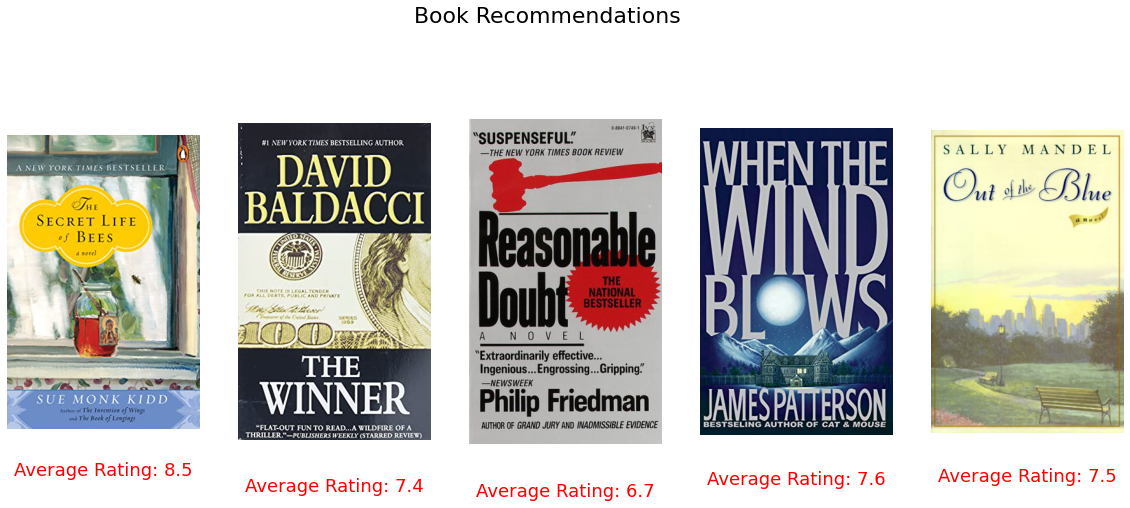

In [ ]:
model_based_reco(23511)

Book Recommendations  Actual_Rating_by_user  Predicted_rating
0             Animal Farm                    5.0          8.486507
1         Giovanni's Room                    7.0          8.411168
2  All Tomorrow's Parties                    8.0          7.817600
3         The Law of Love                    9.0          7.271566

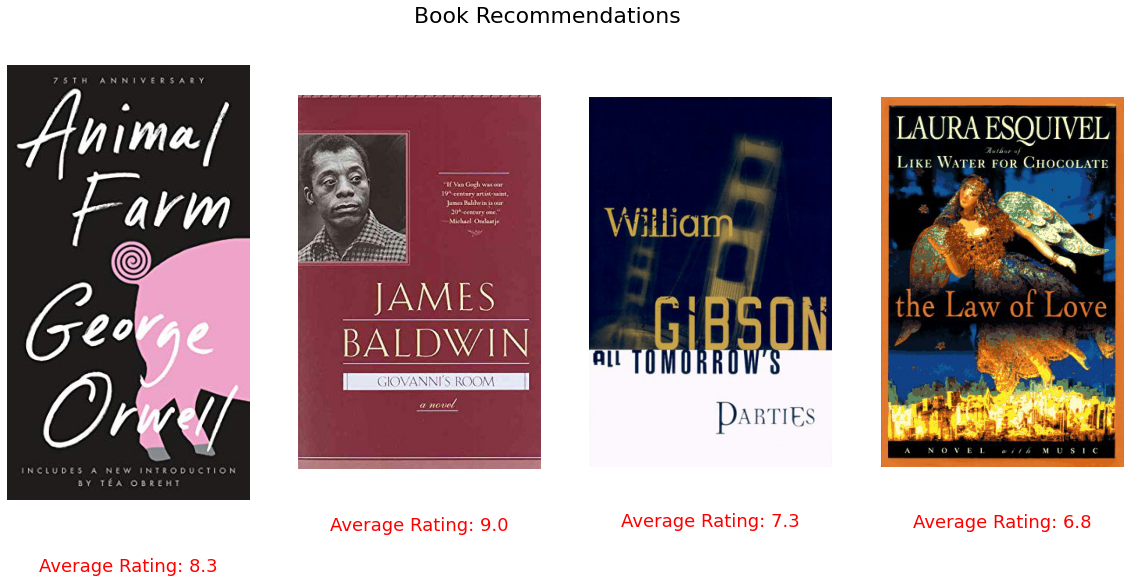

In [ ]:
model_based_reco(129503)

In [ ]:
def precision_recall_at_k(predictions, k, threshold):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions,recalls

In [ ]:
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=4)

In [ ]:
 # Precision and recall can then be averaged over all users
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

0.9745191014258814
0.9725341601363063


#Collaborative Filtering based Recommendation System--(model based without surprise)

In [ ]:
common_books.head()

ISBN              Book-Title Book-Author Year-Of-Publication  \
32  0399135782  The Kitchen God's Wife     Amy Tan                1991   
34  0399135782  The Kitchen God's Wife     Amy Tan                1991   
37  0399135782  The Kitchen God's Wife     Amy Tan                1991   
40  0399135782  The Kitchen God's Wife     Amy Tan                1991   
54  0399135782  The Kitchen God's Wife     Amy Tan                1991   

           Publisher  User-ID  Book-Rating                         Location  \
32  Putnam Pub Group    29526          9.0        knoxville, tennessee, usa   
34  Putnam Pub Group    46398          9.0          san antonio, texas, usa   
37  Putnam Pub Group    67958         10.0          idaho falls, idaho, usa   
40  Putnam Pub Group   115097          7.0                       seattle, ,   
54  Putnam Pub Group   230522          7.0  colorado springs, colorado, usa   

     Age  Avg_Rating  Total_No_Of_Users_Rated  
32  26.0       8.125                        8  
34  37.0       8.125                        8  
37  39.0       8.125                        8  
40  27.0       8.125                        8  
54  52.0       8.125                        8

In [ ]:

users_interactions_count_df = common_books.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 50].reset_index()[['User-ID']]
print('# of users with at least 50 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 26994
# of users with at least 50 interactions: 311


In [ ]:
print('# of interactions: %d' % len(common_books))
interactions_from_selected_users_df = common_books.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 120829
# of interactions from users with at least 5 interactions: 27625


In [ ]:
interactions_from_selected_users_df.head(10)

ISBN                                         Book-Title  \
0  0142000663  The Grapes of Wrath: John Steinbeck Centennial...   
1  0836218256                Something Under the Bed Is Drooling   
2  0060256664                                    The Giving Tree   
3  0688149790                                           Babyhood   
4  0140386645                   The Westing Game (Now in Speak!)   
5  0345337662                         Interview with the Vampire   
6  0765345048                Kushiel's Chosen (Kushiel's Legacy)   
7  0590353403     Harry Potter and the Sorcerer's Stone (Book 1)   
8  0812533550      Ender's Game (Ender Wiggins Saga (Paperback))   
9  0886773784  Arrows of the Queen ( The Heralds of Valdemar,...   

        Book-Author Year-Of-Publication  \
0    John Steinbeck                2002   
1    Bill Watterson                1988   
2  Shel Silverstein                1964   
3       Paul Reiser                1997   
4      Ellen Raskin                1997   
5         Anne Rice                1993   
6  Jacqueline Carey                2003   
7     J. K. Rowling                1998   
8  Orson Scott Card                1986   
9   Mercedes Lackey                1996   

                                Publisher  User-ID  Book-Rating  \
0                           Penguin Books     2033         10.0   
1               Andrews McMeel Publishing     2033          9.0   
2                           HarperCollins     2033         10.0   
3            William Morrow &amp; Company     2033          8.0   
4  Penguin Putnam Books for Young Readers     2033          8.0   
5                        Ballantine Books     2033          5.0   
6                             Tor Fantasy     2033         10.0   
7                              Scholastic     2033          9.0   
8                               Tor Books     2033         10.0   
9                               Daw Books     2033         10.0   

               Location   Age  Avg_Rating  Total_No_Of_Users_Rated  
0  omaha, nebraska, usa  27.0    8.947368                       19  
1  omaha, nebraska, usa  27.0    8.857143                       14  
2  omaha, nebraska, usa  27.0    8.500000                        4  
3  omaha, nebraska, usa  27.0    7.500000                       10  
4  omaha, nebraska, usa  27.0    8.157895                       19  
5  omaha, nebraska, usa  27.0    7.839779                      181  
6  omaha, nebraska, usa  27.0    9.090909                       11  
7  omaha, nebraska, usa  27.0    9.144330                       97  
8  omaha, nebraska, usa  27.0    9.555556                        9  
9  omaha, nebraska, usa  27.0    8.357143                       14

In [ ]:
import math

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 27625


ISBN  User-ID  Book-Rating
0  0001048082   109901     3.169925
1  0002251760    37712     3.459432
2  0002251760   123883     2.584963
3  0002251760   274004     3.459432
4  0006485200   225087     3.459432

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 22100
# interactions on Test set: 5525


In [ ]:
interactions_test_df.head()

ISBN  User-ID  Book-Rating
8790   0385335881   218568     3.321928
13827  0446603716    28634     3.459432
24932  0804114609   136348     3.000000
5508   034541389X    95359     3.169925
5030   0345368975   196160     3.321928

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN     0001048082  0002251760  0006485200  000649840X  000651202X  \
User-ID                                                               
2033            0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
4017            0.0         0.0         0.0         0.0         0.0   
5582            0.0         0.0         0.0         0.0         0.0   
6251            0.0         0.0         0.0         0.0         0.0   

ISBN     000651202x  0006550789  0006742939  0006742947  0007141076  ...  \
User-ID                                                              ...   
2033            0.0         0.0         0.0         0.0         0.0  ...   
2276            0.0         0.0         0.0         0.0         0.0  ...   
4017            0.0         0.0         0.0         0.0         0.0  ...   
5582            0.0         0.0         0.0         0.0         0.0  ...   
6251            0.0         0.0         0.0         0.0         0.0  ...   

ISBN     8845247414  9500722984  9501513092  9504905501  950491036X  \
User-ID                                                               
2033            0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
4017            0.0         0.0         0.0         0.0         0.0   
5582            0.0         0.0         0.0         0.0         0.0   
6251            0.0         0.0         0.0         0.0         0.0   

ISBN     9580412340  9681500555  B00001U0CP  B00006I4OX  B00009NDAN  
User-ID                                                              
2033            0.0         0.0         0.0         0.0         0.0  
2276            0.0         0.0         0.0         0.0         0.0  
4017            0.0         0.0         0.0         0.0         0.0  
5582            0.0         0.0         0.0         0.0         0.0  
6251            0.0         0.0         0.0         0.0         0.0  

[5 rows x 8207 columns]

In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2276, 4017, 5582, 6251, 6543, 6563, 7346, 8067, 8245]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 80

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(311, 8207)

In [ ]:
U.shape

(311, 80)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(80, 80)

In [ ]:
Vt.shape

(80, 8207)

<font color='blue'>After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-0.03926783, -0.04207181, -0.02871207, ...,  0.0773091 ,
         0.00481114, -0.00503404],
       [ 0.03680238, -0.01926802, -0.06020491, ..., -0.03313189,
         0.02051583,  0.00951222],
       [-0.05001815, -0.02789692, -0.02735178, ...,  0.04571327,
        -0.10704867, -0.11424501],
       ...,
       [-0.00383116,  0.03646026, -0.01740395, ..., -0.02281819,
        -0.01863728, -0.05489312],
       [-0.00929254,  0.13040486, -0.02178763, ..., -0.00892417,
         0.00461987,  0.00451853],
       [-0.01021838,  0.14939135, -0.0716453 , ...,  0.06418148,
        -0.02034964,  0.01457395]])

In [ ]:
all_user_predicted_ratings.shape

(311, 8207)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

2033      2276      4017      5582      6251      6543    \
ISBN                                                                     
0001048082 -0.039268  0.036802 -0.050018 -0.004304 -0.063174 -0.015304   
0002251760 -0.042072 -0.019268 -0.027897  0.129439  0.157015  0.021959   
0006485200 -0.028712 -0.060205 -0.027352 -0.090730  0.026130  0.027468   
000649840X -0.034788 -0.012781 -0.098287 -0.034781 -0.048195  0.036477   
000651202X -0.006914  0.012837  0.055419 -0.008361 -0.013225  0.001693   

              6563      7346      8067      8245    ...    270820    271448  \
ISBN                                                ...                       
0001048082  0.008576  0.004027 -0.021811 -0.018312  ...  0.061040  0.001589   
0002251760  0.036493 -0.050161 -0.068496 -0.162760  ... -0.020016 -0.238223   
0006485200 -0.014601  0.003798 -0.009023  0.094396  ...  0.027687 -0.085844   
000649840X  0.028625  0.007907 -0.046450  0.020658  ...  0.037397 -0.017334   
000651202X -0.022191  0.012651  0.017418 -0.008424  ... -0.019710 -0.049452   

              271705    273113    274004    274061    274301    275970  \
ISBN                                                                     
0001048082 -0.017187  0.013927 -0.014862  0.087009 -0.077911 -0.003831   
0002251760  0.202224  0.727740  0.273145  0.060591  0.162628  0.036460   
0006485200  0.012049 -0.039351  0.085251  0.077020  0.019091 -0.017404   
000649840X  0.049482  0.011491  0.023412 -0.009071  0.026058  0.011932   
000651202X  0.006993  0.018086  0.007673 -0.052079  0.060436  0.036992   

              276680    277427  
ISBN                            
0001048082 -0.009293 -0.010218  
0002251760  0.130405  0.149391  
0006485200 -0.021788 -0.071645  
000649840X  0.013968  0.001718  
000651202X  0.026603  0.090650  

[5 rows x 311 columns]

In [ ]:
len(cf_preds_df.columns)

311

In [ ]:
global books
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(common_books['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

<font color='blue'>**Let's recommend books to User-Id 69078 and see the results.**

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[109901, 37712, 123883, 274004, 225087, 149908, 158226, 180651, 76626, 94347, 274004, 30711, 56399, 76626, 196077, 60244, 105517, 180651, 7346, 109574, 157273, 225087, 101876, 160558, 197364, 227447, 235105, 95359, 248718, 271448, 93629, 190708, 60707, 125774, 165308, 204864, 16634, 38023, 251844, 38023, 16634, 55492, 122429, 203240, 219683, 16634, 38023, 126736, 38023, 251844, 16634, 251844, 171118, 55490, 260897, 125519, 270820, 123883, 32773, 88693, 7346, 60244, 125519, 8681, 69078, 12538, 52584, 110934, 113270, 128835, 150979, 179734, 209516, 229741, 269566, 277427, 12538, 7346, 52584, 78973, 150979, 52584, 125519, 128835, 196160, 16634, 172742, 2276, 52917, 93629, 66942, 98391, 36907, 82497, 98391, 114368, 242006, 265889, 98391, 258185, 98391, 258185, 110973, 4017, 10560, 115435, 149908, 224349, 112001, 76626, 29526, 165308, 251844, 265889, 271705, 98391, 27472, 101606, 261829, 98391, 235105, 66680, 98391, 125774, 258185, 98391, 234359, 265889, 53220, 65584, 13552, 16795, 31315, 2

In [ ]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  123883
Recommendation for User-ID =  123883
         ISBN                                Book-Title  recStrength
0  0380808072                                First Lady     1.803246
1  0380794489               Lady Be Good (Avon Romance)     1.797872
2  0671670069                            Guardian Angel     1.627315
3  0515135216                             Dark Symphony     1.467984
4  0066211220                   Breathing Room: A Novel     1.234857
5  0380897393                          When Love Awaits     1.037817
6  0373218427                             From This Day     1.032653
7  0380753022  Gentle Rogue (Malory Novels (Paperback))     1.025513
8  0671021001     She's Come Undone (Oprah's Book Club)     1.018993
9  0515127833                               River's End     1.014421


# **Evaluate**
### In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* ### For each user
    * ### For each item the user has interacted in test set
        * ### Sample 100 other items the user has never interacted.   
        * ### Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ###  Aggregate the global Top-N accuracy metrics

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(common_books['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set((interacted_values_testset['ISBN']))
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
310 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.26461538461538464, 'recall@10': 0.3560180995475113}


hits@5_count  hits@10_count  interacted_count  recall@5  recall@10  \
14             25             34               149  0.167785   0.228188   
51             29             40                98  0.295918   0.408163   
118            13             20                84  0.154762   0.238095   
3              11             18                72  0.152778   0.250000   
15             22             32                72  0.305556   0.444444   
166             9             11                54  0.166667   0.203704   
114            25             30                52  0.480769   0.576923   
34              7             11                49  0.142857   0.224490   
61              8             11                48  0.166667   0.229167   
38              9             18                40  0.225000   0.450000   

     User-ID  
14     98391  
51    153662  
118    16795  
3      95359  
15    114368  
166   235105  
114   123883  
34     60244  
61    204864  
38     78973